In [1]:
# Add relevant Jupyter notebook extensions
%load_ext autoreload
%autoreload 2

In [2]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/jinrhee/.venvs/b1-scientific-computing/lib/python3.12/site-packages', '/Users/jinrhee/Desktop/Oxford/Engineering Science/2024-25/B1 Engineering Computation/Scientific Coding/b1-coding-practical-mt24']


In [3]:
# Testing module imports
from uuv_mission.terrain import generate_random_multisine_timeseries

In [7]:
# Import relevant modules
from uuv_mission.dynamic import *
from uuv_mission.terrain import *


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

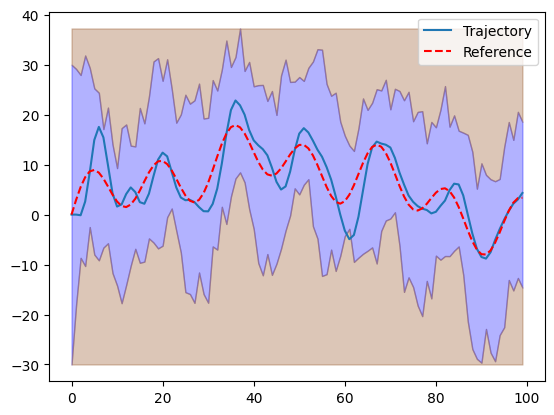

In [1]:
# Import relevant modules
from uuv_mission.control import *
from uuv_mission.dynamic import *
from uuv_mission.terrain import *

sub = Submarine()
controller = Controller()
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("data/mission.csv") # You must implement this method in the Mission class
trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

[Kp, Kd]: [ 0.09999999999999999   0.39999999999999997 ]


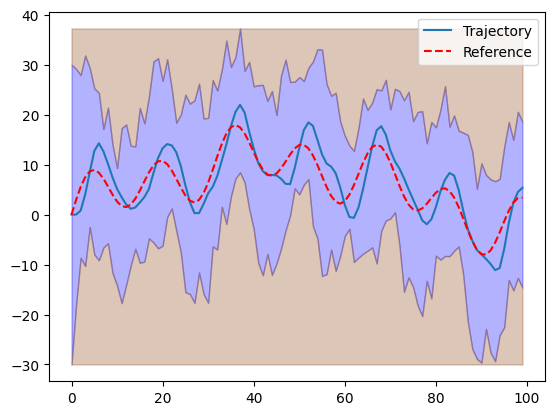

[Kp, Kd]: [ 0.09999999999999999   0.6 ]


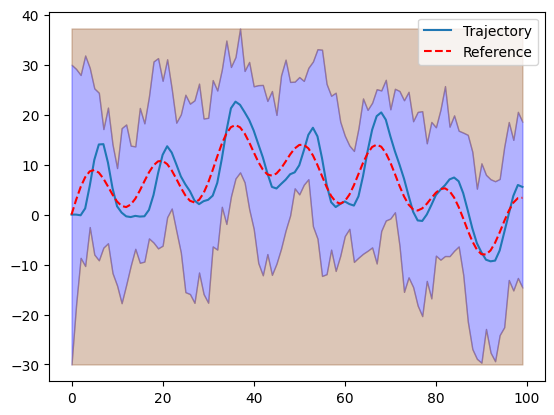

[Kp, Kd]: [ 0.09999999999999999   0.8 ]


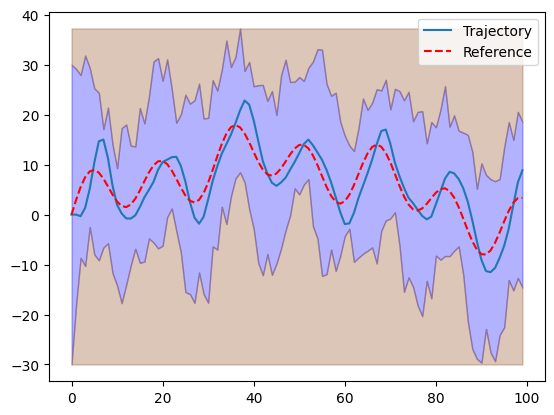

[Kp, Kd]: [ 0.15   0.39999999999999997 ]


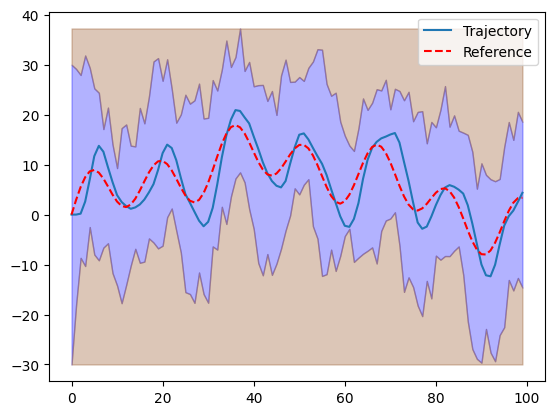

[Kp, Kd]: [ 0.15   0.6 ]


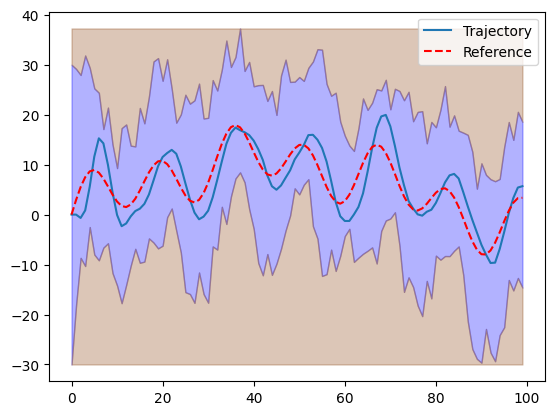

[Kp, Kd]: [ 0.15   0.8 ]


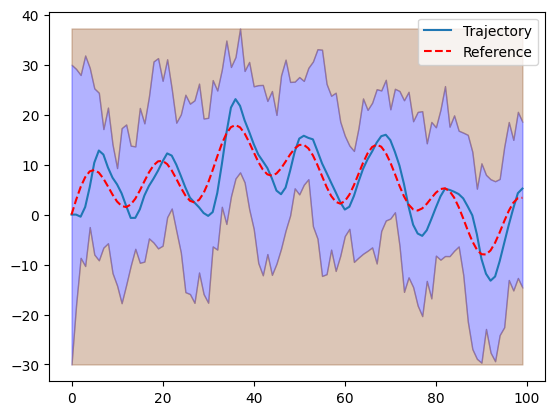

[Kp, Kd]: [ 0.2   0.39999999999999997 ]


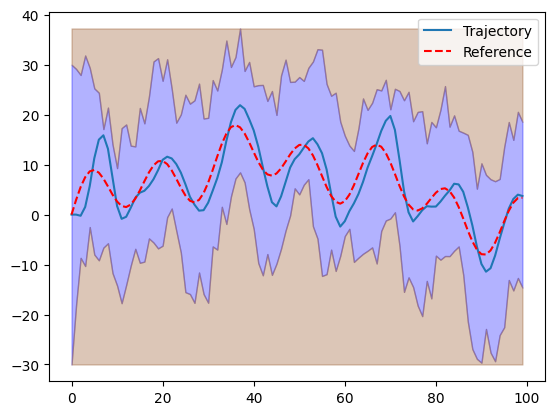

[Kp, Kd]: [ 0.2   0.6 ]


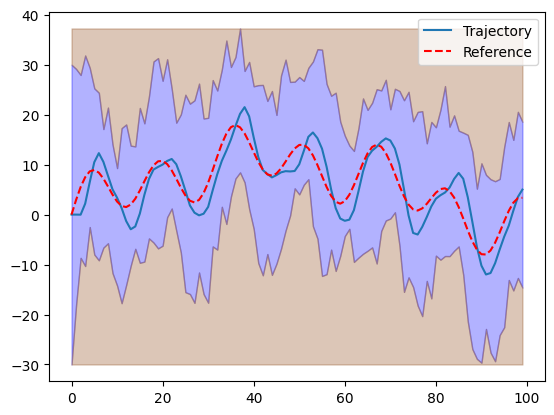

[Kp, Kd]: [ 0.2   0.8 ]


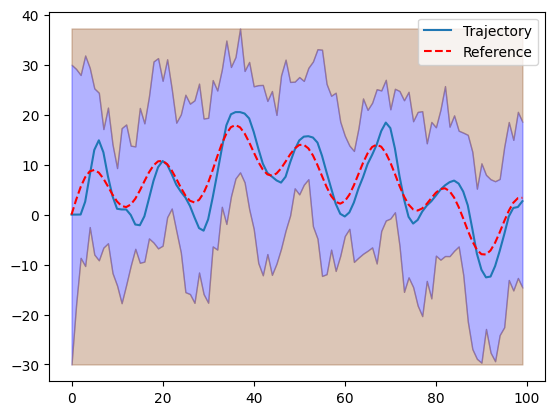

In [6]:
# Test for adjusted gains
kps = np.linspace(-0.05, 0.05, 3) + 0.15
kds = np.linspace(-0.2, 0.2, 3)+ 0.6

mission = Mission.from_csv("data/mission.csv")

for kp in kps:
    for kd in kds:
        print("[Kp, Kd]: [", kp, ' ', kd, ']')
        sub = Submarine()
        controller = Controller()
        closed_loop = ClosedLoop(sub, controller)
        trajectory = closed_loop.simulate_with_random_disturbances(mission)
        trajectory.plot_completed_mission(mission)